# Alex's Personal Notebook

Details will go here eventually.

To Do:
- 7/25 - 7/26: Clean data individually
- 7/25 - 7/26: Clean data with team
- 7/25 - 7/26: Explore data
- 7/26:        Define business questions
- 7/26:        Start analysis
- 7/29:        Finish analysis and presentation materials
- 7/31:        Finalize project
- 8/01:        Polish and present with team
- 8/02:        Present to Deloitte

## Starting exploration

**Importing the Data**

The data files were compressed and stored in different formats. The first step, then, is to decompress them and determine how to parse their structures.

- bom.movie_gross.csv.gz
- im.db.zip
- rt.movie_info.tsv.gz
- rt.reviews.tsv.gz       <-- This one is encoded with ANSI
- tmdb.movies.csv.gz
- tn.movie_budgets.csv.gz

Using pandas, we should be able to read the zipped files directly into dataframes.

In [1]:
# imports
import numpy as np
import pandas as pd
import sqlite3
import zipfile

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# read the files into dataframes

movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
reviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='ANSI')
movies = pd.read_csv('zippedData/tmdb.movies.csv.gz')
movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', encoding='utf-8')

# create temporary SQL database from im.db.zip

with zipfile.ZipFile('zippedData/im.db.zip', 'r') as z:
    z.printdir()
    imdb_data = z.extractall()

# open SQL link to im.db

conn = sqlite3.connect('im.db')

File Name                                             Modified             Size
im.db                                          2021-12-20 16:31:38    169443328


## Basic info on the imported data

In [3]:
# exploring movie_gross

movie_gross.head()

# title	studio	domestic_gross	foreign_gross	year
# 0	Toy Story 3	BV	415000000.0	652000000	2010
# 1	Alice in Wonderland (2010)	BV	334200000.0	691300000	2010
# 2	Harry Potter and the Deathly Hallows Part 1	WB	296000000.0	664300000	2010
# 3	Inception	WB	292600000.0	535700000	2010
# 4	Shrek Forever After	P/DW	238700000.0	513900000	2010

movie_gross.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 3387 entries, 0 to 3386
# Data columns (total 5 columns):
#  #   Column          Non-Null Count  Dtype  
# ---  ------          --------------  -----  
#  0   title           3387 non-null   object 
#  1   studio          3382 non-null   object 
#  2   domestic_gross  3359 non-null   float64
#  3   foreign_gross   2037 non-null   object 
#  4   year            3387 non-null   int64  
# dtypes: float64(1), int64(1), object(3)
# memory usage: 132.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [4]:
movie_info.head()

# id	synopsis	rating	genre	director	writer	theater_date	dvd_date	currency	box_office	runtime	studio
# 0	1	This gritty, fast-paced, and innovative police...	R	Action and Adventure|Classics|Drama	William Friedkin	Ernest Tidyman	Oct 9, 1971	Sep 25, 2001	NaN	NaN	104 minutes	NaN
# 1	3	New York City, not-too-distant-future: Eric Pa...	R	Drama|Science Fiction and Fantasy	David Cronenberg	David Cronenberg|Don DeLillo	Aug 17, 2012	Jan 1, 2013	$	600,000	108 minutes	Entertainment One
# 2	5	Illeana Douglas delivers a superb performance ...	R	Drama|Musical and Performing Arts	Allison Anders	Allison Anders	Sep 13, 1996	Apr 18, 2000	NaN	NaN	116 minutes	NaN
# 3	6	Michael Douglas runs afoul of a treacherous su...	R	Drama|Mystery and Suspense	Barry Levinson	Paul Attanasio|Michael Crichton	Dec 9, 1994	Aug 27, 1997	NaN	NaN	128 minutes	NaN
# 4	7	NaN	NR	Drama|Romance	Rodney Bennett	Giles Cooper	NaN	NaN	NaN	NaN	200 minutes	NaN

movie_info.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 1560 entries, 0 to 1559
# Data columns (total 12 columns):
#  #   Column        Non-Null Count  Dtype 
# ---  ------        --------------  ----- 
#  0   id            1560 non-null   int64 
#  1   synopsis      1498 non-null   object
#  2   rating        1557 non-null   object
#  3   genre         1552 non-null   object
#  4   director      1361 non-null   object
#  5   writer        1111 non-null   object
#  6   theater_date  1201 non-null   object
#  7   dvd_date      1201 non-null   object
#  8   currency      340 non-null    object
#  9   box_office    340 non-null    object
#  10  runtime       1530 non-null   object
#  11  studio        494 non-null    object
# dtypes: int64(1), object(11)
# memory usage: 146.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [5]:
reviews.head()

# 	id	review	rating	fresh	critic	top_critic	publisher	date
# 0	3	A distinctly gallows take on contemporary fina...	3/5	fresh	PJ Nabarro	0	Patrick Nabarro	November 10, 2018
# 1	3	It's an allegory in search of a meaning that n...	NaN	rotten	Annalee Newitz	0	io9.com	May 23, 2018
# 2	3	... life lived in a bubble in financial dealin...	NaN	fresh	Sean Axmaker	0	Stream on Demand	January 4, 2018
# 3	3	Continuing along a line introduced in last yea...	NaN	fresh	Daniel Kasman	0	MUBI	November 16, 2017
# 4	3	... a perverse twist on neorealism...	NaN	fresh	NaN	0	Cinema Scope	October 12, 2017

reviews.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 54432 entries, 0 to 54431
# Data columns (total 8 columns):
#  #   Column      Non-Null Count  Dtype 
# ---  ------      --------------  ----- 
#  0   id          54432 non-null  int64 
#  1   review      48869 non-null  object
#  2   rating      40915 non-null  object
#  3   fresh       54432 non-null  object
#  4   critic      51710 non-null  object
#  5   top_critic  54432 non-null  int64 
#  6   publisher   54123 non-null  object
#  7   date        54432 non-null  object
# dtypes: int64(2), object(6)
# memory usage: 3.3+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [6]:
movies.head()

# Unnamed: 0	genre_ids	id	original_language	original_title	popularity	release_date	title	vote_average	vote_count
# 0	0	[12, 14, 10751]	12444	en	Harry Potter and the Deathly Hallows: Part 1	33.533	2010-11-19	Harry Potter and the Deathly Hallows: Part 1	7.7	10788
# 1	1	[14, 12, 16, 10751]	10191	en	How to Train Your Dragon	28.734	2010-03-26	How to Train Your Dragon	7.7	7610
# 2	2	[12, 28, 878]	10138	en	Iron Man 2	28.515	2010-05-07	Iron Man 2	6.8	12368
# 3	3	[16, 35, 10751]	862	en	Toy Story	28.005	1995-11-22	Toy Story	7.9	10174
# 4	4	[28, 878, 12]	27205	en	Inception	27.920	2010-07-16	Inception	8.3	22186

movies.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 26517 entries, 0 to 26516
# Data columns (total 10 columns):
#  #   Column             Non-Null Count  Dtype  
# ---  ------             --------------  -----  
#  0   Unnamed: 0         26517 non-null  int64  
#  1   genre_ids          26517 non-null  object 
#  2   id                 26517 non-null  int64  
#  3   original_language  26517 non-null  object 
#  4   original_title     26517 non-null  object 
#  5   popularity         26517 non-null  float64
#  6   release_date       26517 non-null  object 
#  7   title              26517 non-null  object 
#  8   vote_average       26517 non-null  float64
#  9   vote_count         26517 non-null  int64  
# dtypes: float64(2), int64(3), object(5)
# memory usage: 2.0+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [7]:
movie_budgets.head()

# 	id	release_date	movie	production_budget	domestic_gross	worldwide_gross
# 0	1	Dec 18, 2009	Avatar	$425,000,000	$760,507,625	$2,776,345,279
# 1	2	May 20, 2011	Pirates of the Caribbean: On Stranger Tides	$410,600,000	$241,063,875	$1,045,663,875
# 2	3	Jun 7, 2019	Dark Phoenix	$350,000,000	$42,762,350	$149,762,350
# 3	4	May 1, 2015	Avengers: Age of Ultron	$330,600,000	$459,005,868	$1,403,013,963
# 4	5	Dec 15, 2017	Star Wars Ep. VIII: The Last Jedi	$317,000,000	$620,181,382	$1,316,721,747

movie_budgets.info()

# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 5782 entries, 0 to 5781
# Data columns (total 6 columns):
#  #   Column             Non-Null Count  Dtype 
# ---  ------             --------------  ----- 
#  0   id                 5782 non-null   int64 
#  1   release_date       5782 non-null   object
#  2   movie              5782 non-null   object
#  3   production_budget  5782 non-null   object
#  4   domestic_gross     5782 non-null   object
#  5   worldwide_gross    5782 non-null   object
# dtypes: int64(1), object(5)
# memory usage: 271.2+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [8]:
# explore im.db

pd.read_sql("""
    SELECT name
      FROM 'sqlite_master'
     WHERE type = 'table'
  ;
""", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


# Exploration Keynotes and Cleaning

### movie_gross

This csv imported with 3387 rows. The 5 columns are title, studio, domestic_gross, foreign_gross, and year. Of these, only title and year were complete. studio and domestic_gross were effectively complete (only having a few null values), but foreign_gross was missing from > 1/3 of the rows. The data spans the years of 2010-2018.

Foreign_gross was initially formatted as string objects, but was recast as floats. The question remains what to do with the NaN values, though.

The values for domestic_gross taper off towards the end each year, implying that the data is pre-sorted by domestic_gross. This is also true of foreign_gross, giving the frame an internal two-level sort on domestic_gross and foreign_gross descending.

There are many missing values in the foreign_gross column and some in the domestic_gross column. It is unclear if these represent a lack of data or the fact that the movie did not make any money in that market. Since there are no values of 0 in either column, it is likely a lack of revenue and is therefore significant. The most reasonable course of action, then, might be to replace the NaN values in those columns with 0's.

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 3387 entries, 0 to 3386
    Data columns (total 5 columns):
    . #   Column          Non-Null Count  Dtype  
    ---  ------          --------------  -----  
     0   title           3387 non-null   object 
     1   studio          3382 non-null   object 
     2   domestic_gross  3359 non-null   float64
     3   foreign_gross   2037 non-null   object 
     4   year            3387 non-null   int64  
    dtypes: float64(1), int64(1), object(3)
    memory usage: 132.4+ KB

In [9]:
# cleaning movie_gross

# convert foreign_gross from strings to floats
movie_gross["foreign_gross"] = movie_gross.foreign_gross.str.replace(",", "").astype('float')

# handle NaN values in foreign_gross and domestic_gross by replacing NaN with 0
## many of the NaN's may have actual monetary values that were not included in the database
movie_gross["domestic_gross"].fillna(0, inplace=True)
movie_gross["foreign_gross"].fillna(0, inplace=True)

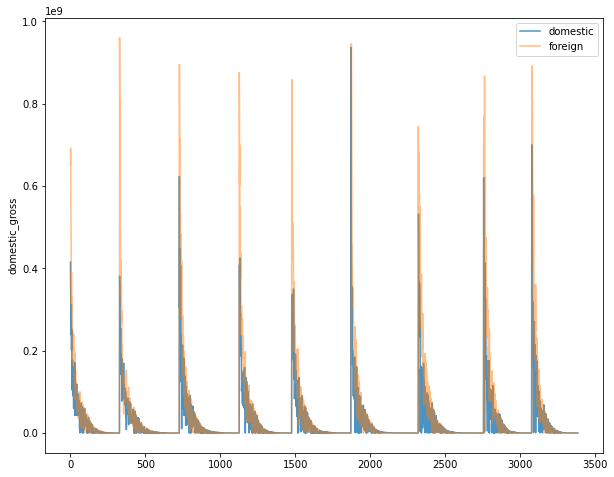

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(x=movie_gross.index, y=movie_gross["domestic_gross"], alpha=0.8, ax=ax, label='domestic')
sns.lineplot(x=movie_gross.index, y=movie_gross["foreign_gross"], 
             alpha=0.5, ax=ax, label='foreign');

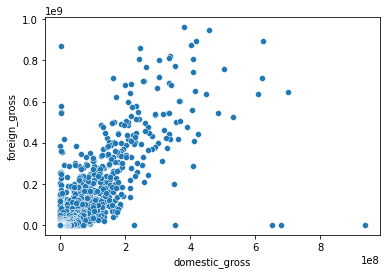

In [11]:
sns.scatterplot(x=movie_gross["domestic_gross"], y=movie_gross["foreign_gross"]);

### movie_info

This tsv imported with 1560 rows. The 12 columns are id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, and studio. Several of the columns have significant amounts of missing values, including currency, box_office, and studio. Since none of these three carried a significant amount of information, these columns were dropped.

Ratings were strings in the set ['G', 'PG', 'PG-13', 'R', 'NC17', 'NR'].
Genre included all applicable genres and was pipe-separated (i.e. 'Comedy|Drama')
All runtimes are given in minutes.

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 1560 entries, 0 to 1559
    Data columns (total 12 columns):
    . #   Column        Non-Null Count  Dtype 
    ---  ------        --------------  ----- 
     0   id            1560 non-null   int64 
     1   synopsis      1498 non-null   object
     2   rating        1557 non-null   object
     3   genre         1552 non-null   object
     4   director      1361 non-null   object
     5   writer        1111 non-null   object
     6   theater_date  1201 non-null   object
     7   dvd_date      1201 non-null   object
     8   currency      340 non-null    object
     9   box_office    340 non-null    object
     10  runtime       1530 non-null   object
     11  studio        494 non-null    object
    dtypes: int64(1), object(11)
    memory usage: 146.4+ KB

In [12]:
# movie_info.head()
# examining the units for all time values
np.unique([tim.split()[1] for tim in movie_info[movie_info['runtime'].notna()]['runtime']])

array(['minutes'], dtype='<U7')

In [13]:
# clean movie_info

# drop currency, box_office, and studio
try:
    movie_info.drop(columns=["currency", "box_office", "studio"], inplace=True)
except:
    ;

# transform theater_date and dvd_date from strings to datetime objects.
movie_info["theater_date"] = pd.to_datetime(movie_info["theater_date"])
movie_info["dvd_date"] = pd.to_datetime(movie_info["dvd_date"])

# change runtimes from string to float
movie_info["runtime"] = movie_info["runtime"].str.replace(" minutes", "").astype("float64")

### reviews

This tsv imported with 54432 rows. The 8 columns are id, review, rating, fresh, critic, top_critic, publisher, and date. IDs range from 1 to 2000. Reviews are strings. Rating is a mess, with no standard format or denominator. Fresh is either "fresh" or "rotten". Critic is a string critic's name. Top_critic is [0, 1], probably representing whether the critic is rated as a top critic. Publisher is a string publisher name. Date is a string representing review date in the form of 'month day, year' (ex. 'April 1, 1993').


    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 54432 entries, 0 to 54431
    Data columns (total 8 columns):
     #   Column      Non-Null Count  Dtype 
    ---  ------      --------------  ----- 
     0   id          54432 non-null  int64 
     1   review      48869 non-null  object
     2   rating      40915 non-null  object
     3   fresh       54432 non-null  object
     4   critic      51710 non-null  object
     5   top_critic  54432 non-null  int64 
     6   publisher   54123 non-null  object
     7   date        54432 non-null  object
    dtypes: int64(2), object(6)
    memory usage: 3.3+ MB

### Cleaning ratings (courtesy of N. Netznik)
### Approach

We will clean the ratings column, split it into two new columns "num_of_stars" and "out_of_stars", and create a third column 'rating_out_of_10' containing the quotient - a normalized percentage rating.

We will make the following modifications to the ratings column:
- We will be changing all letter "grades" to numerical scores out of 10, evenly distributed between 0 and 10.
    - Note that F+ and F- will be grouped with F.
- We will be replacing all NaN ratings, ratings out of 2, all ratings without an "out-of" denominator, and any other nonsensical ratings with '-1/1'. This will allow us to split all ratings by the '/' character before calculating ratings out of 10; upon creating the new columns we will go back and reset all '-1/1' values to NaN.

In [14]:
def clean_ratings(reviews_df):
    # Change letter ratings to numerical (out of 10)
    reviews_df['rating'].replace('F+', 'F', inplace=True)
    reviews_df['rating'].replace('F-', 'F', inplace=True)

    letter_ratings = ['A+','A','A-','B+','B','B-','C+','C','C-','D+','D','D-','F']
    nums = list(np.round(np.linspace(0,10, 13), 1))
    num_ratings = [f'{str(num)}/10' for num in nums]
    mapping = dict(zip(letter_ratings, num_ratings))

    for rating in letter_ratings:
        reviews_df.replace(rating, mapping[rating], inplace=True)

    reviews_df['rating'].fillna('-1/1', inplace=True)

    # # Remove all ratings that do not contain '/'
    for rating in reviews_df['rating'].unique():
        if "/" not in rating:
            reviews_df['rating'].replace(rating, '-1/1', inplace=True)

    # Remove other nonsensical ratings
    reviews_df['rating'].replace('R', '-1/1', inplace=True)
    reviews_df['rating'].replace('N', '-1/1', inplace=True)
    reviews_df['rating'].replace('T', '-1/1', inplace=True)
    reviews_df['rating'].replace('1/2', '-1/1', inplace=True)
    reviews_df['rating'].replace('2/2', '-1/1', inplace=True)
    reviews_df['rating'].replace('3/2', '-1/1', inplace=True)
    reviews_df['rating'].replace('3 1/2', '-1/1', inplace=True)
    reviews_df['rating'].replace('1-5', '-1/1', inplace=True)
    reviews_df['rating'].replace('5/4', '-1/1', inplace=True)
    reviews_df['rating'].replace('2.1/2', '-1/1', inplace=True)
    reviews_df['rating'].replace('5.5/5', '-1/1', inplace=True)
    
    reviews_df['num_stars'] = reviews_df['rating'].map(lambda x : float(x.split('/')[0]))
    reviews_df['out_of_stars'] = reviews_df['rating'].map(lambda x : float(x.split('/')[1]))
    reviews_df['rating_out_of_10'] = reviews_df['num_stars'] / reviews_df['out_of_stars'] * 10

    reviews_df['rating'].replace('-1/1', np.nan, inplace=True)
    reviews_df['num_stars'].replace(-1.0, np.nan, inplace=True)
    reviews_df['out_of_stars'].replace(1.0, np.nan, inplace=True)
    reviews_df['rating_out_of_10'].replace(-10.0, np.nan, inplace=True)

In [15]:
# clean reviews

# drop duplicates
reviews.drop_duplicates(inplace=True)

# standardize ratings
clean_ratings(reviews) # should remove all strange ratings and standardize remaining; see bottom for code

# chage fresh to a boolean column
## this may not be necessry
# reviews["is_fresh"] = (reviews["fresh"] == "fresh")

# change date to datetime
reviews["date"] = pd.to_datetime(reviews["date"])

## is it worth standardizing ratings by critic?

In [16]:
reviews[reviews['rating_out_of_10'].notna()].head()
# reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date,num_stars,out_of_stars,rating_out_of_10
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,2018-11-10,3.0,5.0,6.0
6,3,"Quickly grows repetitive and tiresome, meander...",5.8/10,rotten,Eric D. Snider,0,EricDSnider.com,2013-07-17,5.8,10.0,5.8
7,3,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0,Las Vegas CityLife,2013-04-21,2.0,5.0,4.0
11,3,"While not one of Cronenberg's stronger films, ...",4.2/10,fresh,Emanuel Levy,0,EmanuelLevy.Com,2013-02-03,4.2,10.0,4.2
12,3,Robert Pattinson works mighty hard to make Cos...,2/4,rotten,Christian Toto,0,Big Hollywood,2013-01-15,2.0,4.0,5.0


### movies

This csv imported with 26517 rows. The 10 columns are 'Unnamed: 0', genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, and vote_count. 'Unnamed: 0' is identical to the index of the frame and was likely used as the index in its prior format. It can be safely dropped. Genre_ids contains list of the genre ids of the movie, repesented by the table below. ID is uncertain, but ranges from 27 to 609444. Original_language is from the set:

   ['ab', 'af', 'ar', 'bg', 'bn', 'bo', 'bs', 'ca', 'cn', 'cr', 'cs',
   'cy', 'da', 'de', 'dz', 'el', 'en', 'es', 'et', 'eu', 'fa', 'fi',
   'fr', 'gu', 'ha', 'he', 'hi', 'hr', 'hu', 'hy', 'hz', 'id', 'is',
   'it', 'ja', 'ka', 'kk', 'kn', 'ko', 'ku', 'ky', 'lo', 'lt', 'lv',
   'mi', 'ml', 'mr', 'nb', 'ne', 'nl', 'no', 'pa', 'pl', 'ps', 'pt',
   'ro', 'ru', 'si', 'sl', 'sn', 'sq', 'sr', 'sv', 'sw', 'ta', 'te',
   'th', 'tl', 'tr', 'uk', 'ur', 'vi', 'xh', 'xx', 'yi', 'zh']

Original_title seems to be the title under which the movie was first released. This is in contrast to title, which is th English translation or re-titling. For correlation within this study, title should be preferred over original title. Popularity is unclear in its meaning, but may represent a % of people who liked it, since the values in the column range from 0.6 to 80.773. Release_date is a string date in the form of yyyy-mm-dd and ranges from 1930 - 2020. Vote-average is a float that ranges from 0.0 to 10.0, suggesting a 10-point scale. Vote_count is an integer ranging from 1 - 22186.

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 26517 entries, 0 to 26516
    Data columns (total 10 columns):
     #   Column             Non-Null Count  Dtype  
    ---  ------             --------------  -----  
     0   Unnamed: 0         26517 non-null  int64  
     1   genre_ids          26517 non-null  object 
     2   id                 26517 non-null  int64  
     3   original_language  26517 non-null  object 
     4   original_title     26517 non-null  object 
     5   popularity         26517 non-null  float64
     6   release_date       26517 non-null  object 
     7   title              26517 non-null  object 
     8   vote_average       26517 non-null  float64
     9   vote_count         26517 non-null  int64  
    dtypes: float64(2), int64(3), object(5)
    memory usage: 2.0+ MB
    
    GENRE ID
- Action          28
- Adventure       12
- Animation       16
- Comedy          35
- Crime           80
- Documentary     99
- Drama           18
- Family          10751
- Fantasy         14
- History         36
- Horror          27
- Music           10402
- Mystery         9648
- Romance         10749
- Science Fiction 878
- TV Movie        10770
- Thriller        53
- War             10752
- Western         37

In [17]:
# clean movies

genre_ids = {28:    'Action',
             12:    'Adventure',
             16:    'Animation',
             35:    'Comedy',
             80:    'Crime',
             99:    'Documentary',
             18:    'Drama',
             10751: 'Family',
             14:    'Fantasy',
             36:    'History',
             27:    'Horror',
             10402: 'Music',
             9648:  'Mystery',
             10749: 'Romance',
             878:   'Science Fiction',
             10770: 'TV Movie',
             53:    'Thriller',
             10752: 'War',
             37:    'Western'
            }

# drop 'Unnamed: 0'
movies.drop(columns="Unnamed: 0", inplace=True)

# drop id since there is no correlation with other tables
movies.drop(columns="id", inplace=True)

# drop original_title (unless we want to come back for this later)
movies.drop(columns="original_title", inplace=True)

# change genre_ids to list type
movies['genre_ids'] = movies['genre_ids'].apply(eval)

# replace genre_ids with genre names as genres
movies['genre_ids'] = movies['genre_ids'].apply(lambda x: [genre_ids.get(item) for item in x])
movies.rename(columns={'genre_ids': 'genres'}, inplace=True)

# make release_date a datetime object
movies["release_date"] = pd.to_datetime(movies["release_date"])

In [18]:
movies.head(10)

,genres,original_language,popularity,release_date,title,vote_average,vote_count
0,"[Adventure, Fantasy, Family]",en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[Fantasy, Adventure, Animation, Family]",en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[Adventure, Action, Science Fiction]",en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[Animation, Comedy, Family]",en,28.005,1995-11-22,Toy Story,7.9,10174
4,"[Action, Science Fiction, Adventure]",en,27.920,2010-07-16,Inception,8.3,22186
5,"[Adventure, Fantasy, Family]",en,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[Action, Adventure, Fantasy, Science Fiction]",en,26.526,2009-12-18,Avatar,7.4,18676
7,"[Animation, Family, Comedy]",en,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[Animation, Family, Comedy]",en,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[Animation, Action, Comedy, Family, Science Fi...",en,22.855,2010-11-04,Megamind,6.8,3635


### movie budgets

This csv imported with 5782 rows. The 6 columns are id, release_date, movie, production_budget, domestic_gross, and worldwide_gross. ID is an integer in the range of 1 - 100, with no imediate correlation inside or outside of the table. Release date is a string object in the form of 'Mon. day, year'. Production budget is a string representing the dollar amount of the budget. 

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 5782 entries, 0 to 5781
    Data columns (total 6 columns):
     #   Column             Non-Null Count  Dtype 
    ---  ------             --------------  ----- 
     0   id                 5782 non-null   int64 
     1   release_date       5782 non-null   object
     2   movie              5782 non-null   object
     3   production_budget  5782 non-null   object
     4   domestic_gross     5782 non-null   object
     5   worldwide_gross    5782 non-null   object
    dtypes: int64(1), object(5)
    memory usage: 271.2+ KB

In [19]:
# cleaning movie_budgets

# replace improperly encoded characters
movie_budgets['movie'] = movie_budgets['movie'].str.replace("â", "'")

# drop id
movie_budgets.drop(columns="id")

# change release_date to a datetime
movie_budgets["release_date"] = pd.to_datetime(movie_budgets["release_date"])

# change production_budget, domestic_gross, and worldwide_gross to float dollar amounts (int was too small)
movie_budgets[["production_budget", "domestic_gross", "worldwide_gross"]] = \
                        movie_budgets[["production_budget", "domestic_gross", "worldwide_gross"]]\
                        .apply(lambda x: (x.replace('[\$,]', '', regex=True).astype(float)))

movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


### im.db

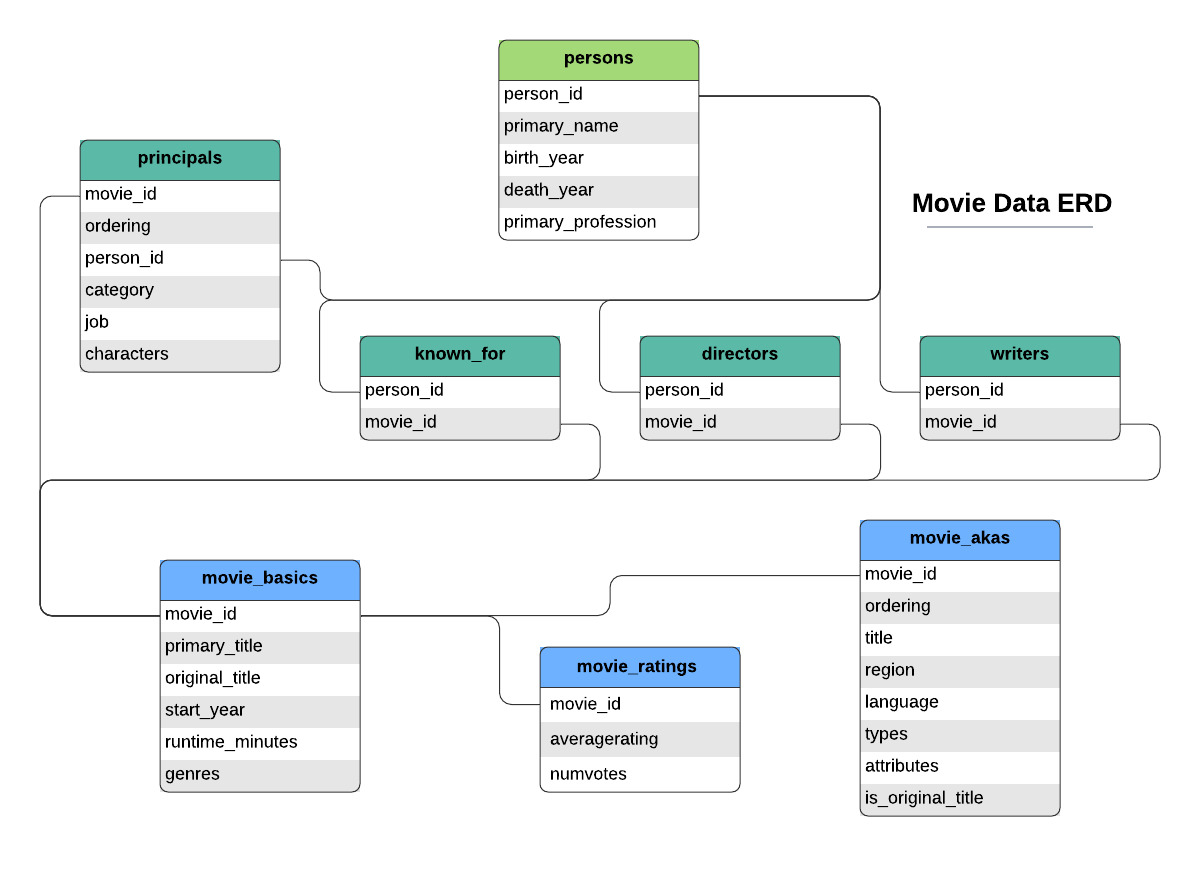

Exploring the im.db file is a more comprehensive task, due to its relational structure. It seems like there are two primary keys which link every table: person_id and movie_id.

Table Details:

    persons (n = 606648)
    	person_id	primary_name	   birth_year	death_year	    primary_profession
    0	nm0061671	Mary Ellen Bauder	NaN	           None	        miscellaneous,production_manager,producer
    
    principals (n = 1028186)
    	movie_id	ordering	person_id	category	job	    characters
    0	tt0111414	   1	     nm0246005	  actor     None	["The Man"]
    ^
    |__ has duplicates with different ordering values
    
    known_for (n = 1638260)
        person_id	movie_id
    0	nm0061671	tt0837562
    
    directors (n = 291174)
        movie_id	person_id
    0	tt0285252	nm0899854
    
    writers (n = 255873)
        movie_id	person_id
    0	tt0285252	nm0899854
    ^
    |__ has duplicates
    
    movie_basics (n = 146144)
        movie_id	primary_title	original_title	start_year	runtime_minutes	  genres
    0	tt0063540	Sunghursh	       Sunghursh	  2013	         175.0	      Action,Crime,Drama
    
    movie_ratings (n = 73856)
    	movie_id	averagerating	numvotes
    0	tt10356526	 8.3	         31
    
    movie_akas (n = 331703)
        movie_id	ordering	title	      region	language	types	attributes	is_original_title
    0	tt0369610	10	       Джурасик свят	BG	      bg	    None	None	     0.0
    ^
    |__ has duplicates because of different regional/language releases; can use is_original_title to filter

In [20]:
# Under construction -- Trying to remove duplicates from tables
# May be better to just import to pandas df?

a = pd.read_sql("SELECT COUNT(*) FROM (SELECT MIN(person_id) FROM directors GROUP BY person_id);", conn)
b = pd.read_sql("SELECT COUNT(*) FROM directors WHERE person_id NOT IN (SELECT MIN(person_id) FROM directors GROUP BY person_id);", conn)
print(a,"--",b)

   COUNT(*)
0    109253 --    COUNT(*)
0         0


In [21]:
# persons, principals, known_for, directors, writers, movie_basics, movie_ratings, movie_akas

parms_persons = {'select': 'person_id, COUNT(*) as CountOf',
                 'from': 'persons'
                 ,'group_by': 'person_id'} #clean

parms_principals = {'select': 'movie_id, person_id, COUNT(*) as CountOf',
                    'from': 'principals'
                    ,'group_by': 'movie_id, person_id'} # has duplicates (of a kind)

parms_known_for = {'select': 'person_id, movie_id, COUNT(*) as CountOf',
                   'from': 'known_for'
                   ,'group_by': 'person_id, movie_id'} # clean

parms_directors = {'select': 'person_id, movie_id, COUNT(*) as CountOf',
                   'from': 'directors'
                   ,'group_by': 'person_id, movie_id'} # has duplicates

parms_writers = {'select': 'person_id, movie_id, COUNT(*) as CountOf',
                   'from': 'writers'
                   ,'group_by': 'person_id, movie_id'} # has duplicates

parms_movie_basics = {'select': 'movie_id, COUNT(*) as CountOf',
                      'from': 'movie_basics'
                      ,'group_by': 'movie_id'} # clean

parms_movie_ratings = {'select': 'movie_id, COUNT(*) as CountOf',
                      'from': 'movie_ratings'
                      ,'group_by': 'movie_id'} # clean

parms_movie_akas = {'select': 'movie_id, COUNT(*) as CountOf',
                      'from': 'movie_akas'
                      ,'group_by': 'movie_id'} # has duplicates

q = \
"""
    SELECT {0[select]}
      FROM {0[from]}
  GROUP BY {0[group_by]}
    HAVING CountOf > 1
 ;
""".format(parms_persons)

# pd.read_sql("""
#     SELECT *
#       FROM principals
#      WHERE person_id == 'nm2335900'
#  ;
# """, conn)

pd.read_sql(q, conn)

,person_id,CountOf


In [22]:
# cleaning im.db
# if needed, just import to pandas df and do there

#remove duplicates from...
### principals

### directors

### writers

### movie_akas

In [23]:
# exploring for ways to link our dataframes

# movie_gross.title
# movies["id"]         # id from 27 to 609444
# movie_info.id        # id from 1 to 2000
# movie_budgets.movie  # id from 1 to 100; link on movie = title instead
# reviews.id           # id from 3 to 2000
# pd.merge(movie_info, reviews, on=["id"])

## Analysis

This begins the section on identifying and investigating potential links for our business case.

Business Case:
<blockquote>
    Computing Vision (a made-up company for the purposes of this project) sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t have much background in creating movies. You are charged with <u>exploring what types of films are currently doing the best at the box office</u> using different samples of available data. You then will translate those findings into actionable insights that the head of Computing Vision's new movie studio can use to <b>help decide what type of films to create</b>.
    </blockquote>

The goal is to help the new studio create profitable movies. Some identified areas of interest are...
- Seasonal trends (A. Donahue)
- Genre effects (C. Lineman)
- Runtime (C. Lineman)
- Review keys (N. Netznik)
- Budget effects (T.V. Nguyen)

Some other areas of interest are...
- Region
- Language
- Actors
- Writers

All times referenced should be in the near-past, as the studio is interested in current box office performance.

To do here:
- [ ] Identify top 5 earning movies by gross proffit and by percent profit, faceted by elements such as region, language, genre

In [24]:
# Engineering profits

# collect all movie_budgets entries for movies in the last ten years (from 2012-present)
from_year = '2010'
recent_budgets = movie_budgets.loc[movie_budgets['release_date'] >= from_year].copy()

# create percent profit column as (worldwide_gross / production_budget)
recent_budgets.loc[:, "percent_profit"] = \
    ((recent_budgets["worldwide_gross"] - recent_budgets["production_budget"]) / recent_budgets["production_budget"])
recent_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,percent_profit
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,1.546673
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-0.572108
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,3.243841
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,3.153696
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,5.710167


In [25]:
# top 5 gross earnings across all categories
print("Top 10 Gross Earnings (all categories)\n", recent_budgets[['movie', 'worldwide_gross', 'percent_profit']]\
      .sort_values('worldwide_gross', ascending=False).head(10))

# top 5 percent earnings across all categories
print("Top 10 Percent Earnings (all categories)\n", recent_budgets[['movie', 'worldwide_gross', 'percent_profit']]\
      .sort_values('percent_profit', ascending=False).head(10))

Top 10 Gross Earnings (all categories)
                                              movie  worldwide_gross  \
5             Star Wars Ep. VII: The Force Awakens     2.053311e+09   
6                           Avengers: Infinity War     2.048134e+09   
33                                  Jurassic World     1.648855e+09   
66                                       Furious 7     1.518723e+09   
26                                    The Avengers     1.517936e+09   
3                          Avengers: Age of Ultron     1.403014e+09   
41                                   Black Panther     1.348258e+09   
260  Harry Potter and the Deathly Hallows: Part II     1.341693e+09   
4                Star Wars Ep. VIII: The Last Jedi     1.316722e+09   
112                 Jurassic World: Fallen Kingdom     1.305773e+09   

     percent_profit  
5          5.710167  
6          5.827114  
33         6.669092  
66         6.993278  
26         5.746382  
3          3.243841  
41         5.741291  
26

In [26]:
recent_budgets[['movie', 'production_budget', 'worldwide_gross', 'percent_profit']]\
      .sort_values('percent_profit', ascending=False).head(25)

,movie,production_budget,worldwide_gross,percent_profit
5679,The Gallows,100000.0,41656474.0,415.564740
5211,The Devil Inside,1000000.0,101759490.0,100.759490
5062,Insidious,1500000.0,99870886.0,65.580591
5213,Unfriended,1000000.0,64364198.0,63.364198
4664,Paranormal Activity 2,3000000.0,177512032.0,58.170677
4249,Split,5000000.0,278964806.0,54.792961
5189,God's Not Dead,1150000.0,63777092.0,54.458341
4248,Get Out,5000000.0,255367951.0,50.073590
3517,Les Intouchables,10800000.0,484873045.0,43.895652
5063,Moonlight,1500000.0,65245512.0,42.497008


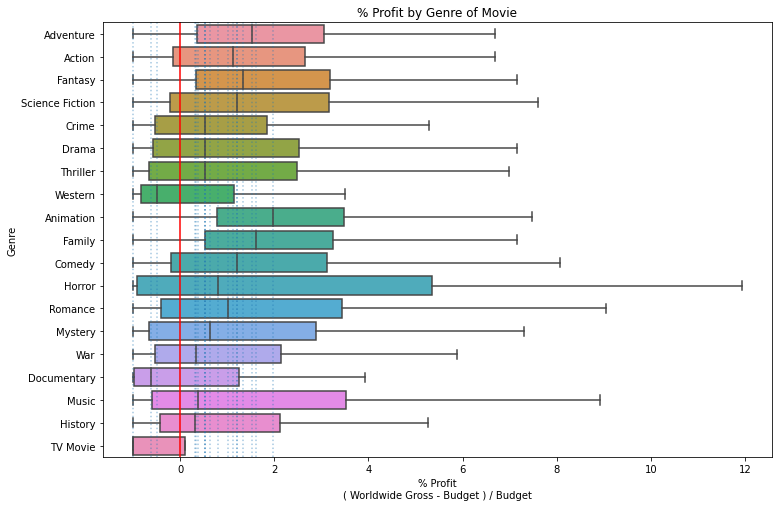

In [27]:
# merging useful info into recent_budgets as recent_info

recent_info = pd.merge(recent_budgets, movies, how='left', left_on='movie', right_on='title')
recent_profit = recent_info[['movie', 'worldwide_gross', 'percent_profit', 'genres', 'release_date_x']].copy()
recent_profit.rename(columns={'release_date_x':'release_date'}, inplace=True)
recent_profit_genre = recent_profit.explode('genres')

# graph percent_profit by genre

fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(data = recent_profit_genre, orient='h', x='percent_profit', y='genres', showfliers=False, ax=ax)
ax.axvline(x=0, color='red')
for genre in recent_profit_genre.groupby('genres')['percent_profit'].median(): # lines at each median
    ax.axvline(x=genre, ls='dotted', alpha = 0.4)
ax.set_xlabel('% Profit\n( Worldwide Gross - Budget ) / Budget')
ax.set_ylabel('Genre')
ax.set_title('% Profit by Genre of Movie');

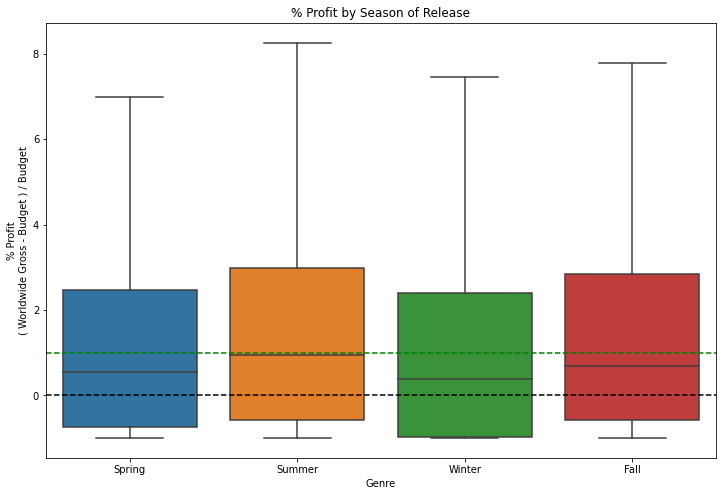

In [28]:
# add season columns to recent_profits
season_map = {1: "Winter",
              2: "Winter",
              3: "Spring",
              4: "Spring",
              5: "Spring",
              6: "Summer",
              7: "Summer",
              8: "Summer",
              9: "Fall",
              10: "Fall",
              11: "Fall",
              12: "Winter" 
              }

recent_profit['season'] = recent_profit['release_date'].dt.month.map(season_map)

# graph percent_profit by season

fig, ax = plt.subplots(figsize=(12, 8))

sns.boxplot(data = recent_profit, orient='v', x='season', y='percent_profit', showfliers=False, ax=ax)
ax.axhline(y = 0, color='black', ls='--') # graph a line for 0 profit (breaking even)
ax.axhline(y = 1, color='green', ls='--') # graph a line for 100% profit
ax.set_xlabel('Genre')
ax.set_ylabel('% Profit\n( Worldwide Gross - Budget ) / Budget')
ax.set_title('% Profit by Season of Release');

<AxesSubplot:xlabel='release_date', ylabel='percent_profit'>

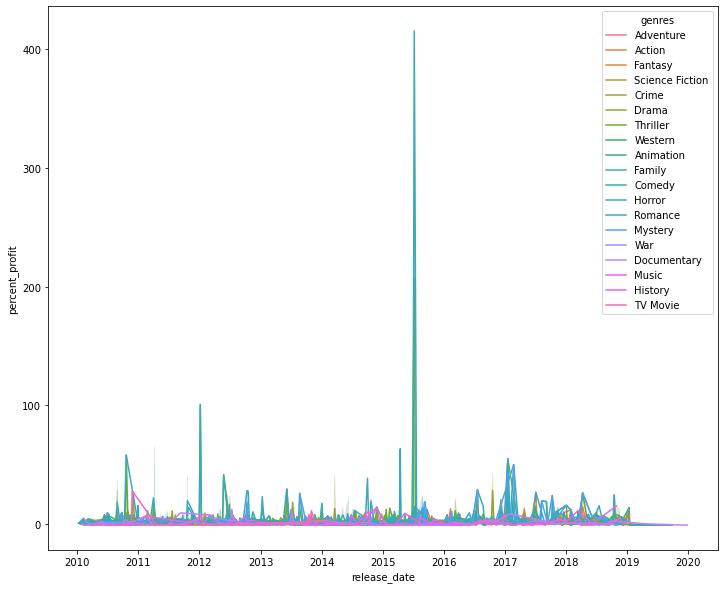

In [37]:
recent_profit_genre

fig, ax = plt.subplots(figsize=(12, 10))

sns.lineplot(
    data=recent_profit_genre
    , x='release_date'
    , y='percent_profit'
    , hue='genres'
    , ax=ax);

In [45]:
filtered_recent_profit = recent_profit.copy()
filtered_recent_profit.sort_values('percent_profit', ascending=False)
filtered_recent_profit = filtered_recent_profit.drop(index=[2469, 2236]) # removes the two skewing data points

TypeError: unsupported operand type(s) for *: 'Timestamp' and 'float'

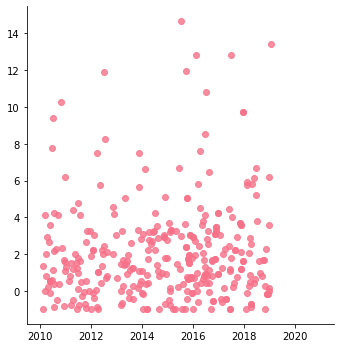

In [50]:
filtered_recent_profit_genre = filtered_recent_profit.explode('genres')

# fig, ax = plt.subplots(figsize=(12, 10))

sns.lmplot(
    data=filtered_recent_profit_genre
    , x='release_date'
    , y='percent_profit'
    , hue='genres'
    );

In [29]:
horror = tmp.loc[tmp['genres'] == 'Horror'].copy()
horror_mean = horror['percent_profit'].mean()
iqr_range = horror['percent_profit'].describe()['75%'] - horror['percent_profit'].describe()['25%']
iqr_upper = horror_mean + iqr_range
iqr_lower = horror_mean - iqr_range

filtered_horror = horror[(horror['percent_profit'] < iqr_upper) & (horror['percent_profit'] > iqr_lower)]

NameError: name 'tmp' is not defined

In [ ]:
sns.boxplot(data=filtered_horror, y='percent_profit')

In [ ]:
recent_budgets.loc[recent_budgets['movie'].str.contains('â')]

In [ ]:
### Testing Cell ###

# mb_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', encoding='utf_8')
# mb_df['movie'] = mb_df['movie'].str.replace("â", "'")
# mb_df.head()
# mb_df[mb_df['movie'].str.contains('Pirates')]

# mb_df.loc[:, 'percent_profit'] = mb_df['worldwide_gross'] / mb_df['production_budget']
# mb_df.head()
# tmp = movie_gross
# tmp[tmp['title'].str.contains("â")]

In [38]:
filtered_recent_profit_genre = recent_profit_genre.copy()
filtered_recent_profit_genre.drop(index=[])